In [1]:
# Dinh Hoang Viet Phuong - 301123263

In [2]:
# Necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from skimage.transform import rotate

C:\Users\dhvie\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# 1. Load the Olivetti faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
images = data.images
X = data.data
y = data.target

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")

Original number of features: 4096
Reduced number of features: 260


In [4]:
# 2.Determine most suitable covariance_type
covariance_types = ['full', 'tied', 'diag', 'spherical']
lowest_bic = np.infty
best_cov_type = None

bics_cov = []
aics_cov = []

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=40, covariance_type=cov_type, random_state=42)
    gmm.fit(X_pca)
    
    bic = gmm.bic(X_pca)
    aic = gmm.aic(X_pca)
    
    bics_cov.append(bic)
    aics_cov.append(aic)
    
    if bic < lowest_bic:
        lowest_bic = bic
        best_cov_type = cov_type

C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [5]:
# 3.Determine the optimal number of clusters for the best covariance type
components_range = range(1, 51)  # Example range: 1 to 50 components
bics_comp = []

for n_components in components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type=best_cov_type, random_state=42)
    gmm.fit(X_pca)
    bics_comp.append(gmm.bic(X_pca))

optimal_n_components = components_range[np.argmin(bics_comp)]

C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

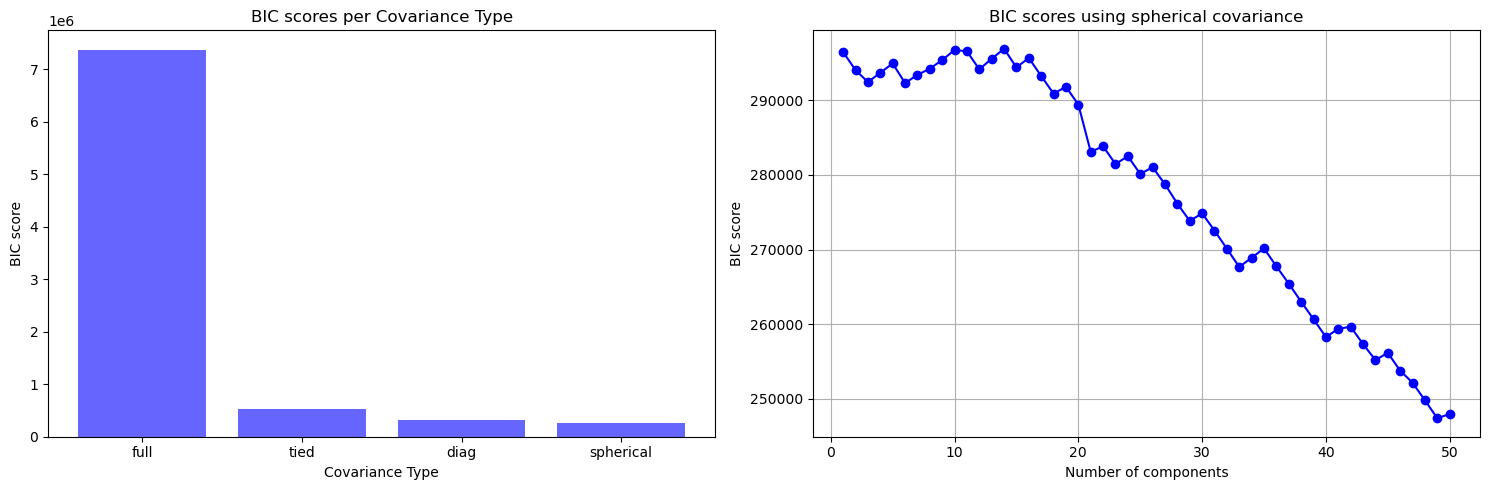

Best covariance type according to BIC: spherical
Optimal number of components according to BIC: 49


In [6]:
# 4.Plot the results
plt.figure(figsize=(15, 5))

# Plot for covariance types
plt.subplot(1, 2, 1)
plt.bar(covariance_types, bics_cov, color='blue', alpha=0.6, label='BIC')
plt.title('BIC scores per Covariance Type')
plt.xlabel('Covariance Type')
plt.ylabel('BIC score')

# Plot for number of components
plt.subplot(1, 2, 2)
plt.plot(components_range, bics_comp, color='blue', marker='o', label='BIC')
plt.title(f'BIC scores using {best_cov_type} covariance')
plt.xlabel('Number of components')
plt.ylabel('BIC score')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Best covariance type according to BIC: {best_cov_type}")
print(f"Optimal number of components according to BIC: {optimal_n_components}")

In [7]:
# Using the previously found optimal configurations
gmm_optimal = GaussianMixture(n_components=optimal_n_components, covariance_type=best_cov_type, random_state=42)
gmm_optimal.fit(X_pca)

C:\Users\dhvie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(covariance_type='spherical', n_components=49, random_state=42)

In [8]:
# 5. Hard clustering for each instance
hard_assignments = gmm_optimal.predict(X_pca)
print("Hard clustering assignments for first 5 instances:")
print(hard_assignments[:5])

Hard clustering assignments for first 5 instances:
[34 34 15  8  8]


In [9]:
# 6. Soft clustering for each instance
soft_assignments = gmm_optimal.predict_proba(X_pca)
print("\nSoft clustering assignments (probabilities) for first 5 instances:")
print(soft_assignments[:5])


Soft clustering assignments (probabilities) for first 5 instances:
[[0.00000000e+000 0.00000000e+000 3.63578104e-202 5.73859468e-018
  1.65987548e-007 0.00000000e+000 1.43122310e-041 7.44531697e-315
  8.93626662e-005 3.24022675e-093 0.00000000e+000 0.00000000e+000
  0.00000000e+000 8.53136108e-020 0.00000000e+000 9.68712546e-013
  0.00000000e+000 1.01059678e-057 0.00000000e+000 0.00000000e+000
  0.00000000e+000 2.40529525e-167 0.00000000e+000 8.68384615e-012
  0.00000000e+000 2.00180042e-098 0.00000000e+000 0.00000000e+000
  0.00000000e+000 2.53657690e-099 0.00000000e+000 0.00000000e+000
  0.00000000e+000 2.96342869e-002 9.70264715e-001 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.14689476e-005 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.02798113e-196 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 3.01861716e-185 1.30914537e-019
  2.21934445e-008 8.03581421e-313 1.18908362e-040 9.919

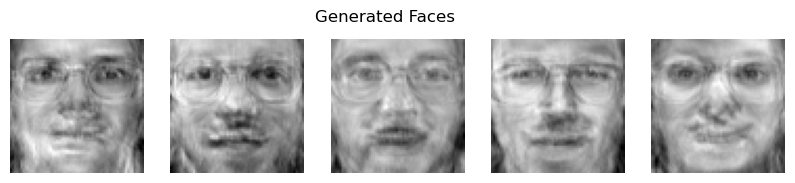

In [10]:
# 7. Generate new faces using the sample() method
num_samples = 5  # Generate 5 samples as an example
samples, _ = gmm_optimal.sample(num_samples)

# Transform the samples back to the original space
generated_faces = pca.inverse_transform(samples)

# Visualization
plt.figure(figsize=(10, 2))
for index, face in enumerate(generated_faces):
    plt.subplot(1, num_samples, index + 1)
    plt.imshow(face.reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.suptitle('Generated Faces')
plt.show()

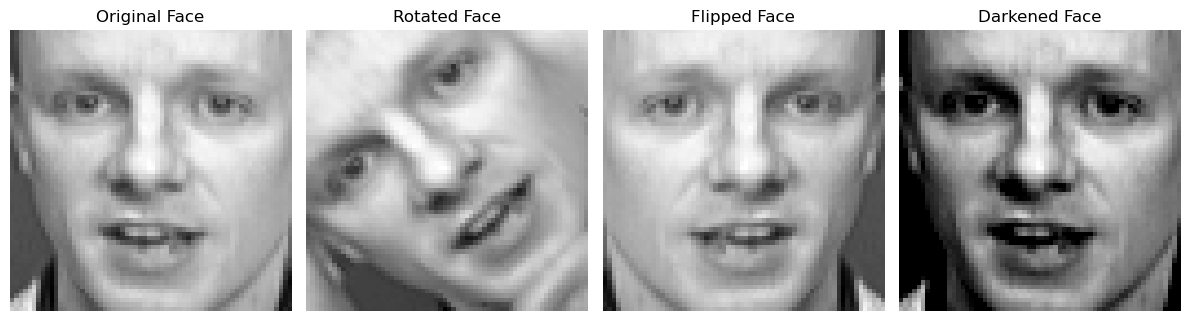

In [11]:
# 8. Modify some images (e.g., rotate, flip, darken)
# Choose a sample face
sample_face = X[0]  # First face as an example
sample_face_2 = sample_face.reshape(64, 64)

# 1. Rotate the image by 45 degrees
rotated_face = rotate(sample_face_2, angle=45, mode='reflect')

# 2. Flip the image horizontally
flipped_face = np.fliplr(sample_face_2)

# 3. Darken the image (reduce its intensity by 30%)
darkened_face = np.clip(sample_face_2 - 0.3, 0, 1)

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(sample_face_2, cmap='gray')
plt.title('Original Face')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(rotated_face, cmap='gray')
plt.title('Rotated Face')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(flipped_face, cmap='gray')
plt.title('Flipped Face')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(darkened_face, cmap='gray')
plt.title('Darkened Face')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# 1. Get scores for original images
original_scores = gmm_optimal.score_samples(X_pca[:10])  #the first 10 images for illustration

# 2. Get scores for the modified images
# Reshape the modified images to the original shape and reduce dimensions using PCA
rotated_pca = pca.transform(rotated_face.reshape(1, -1))
flipped_pca = pca.transform(flipped_face.reshape(1, -1))
darkened_pca = pca.transform(darkened_face.reshape(1, -1))

rotated_score = gmm_optimal.score_samples(rotated_pca)
flipped_score = gmm_optimal.score_samples(flipped_pca)
darkened_score = gmm_optimal.score_samples(darkened_pca)

# Print scores for comparison
print(f"Average score for original images: {np.mean(original_scores)}")
print(f"Score for rotated image: {rotated_score[0]}")
print(f"Score for flipped image: {flipped_score[0]}")
print(f"Score for darkened image: {darkened_score[0]}")

Average score for original images: -354.7010001780201
Score for rotated image: -500.22334118016863
Score for flipped image: -337.157011078666
Score for darkened image: -354.10822824177615
